TASK 2: Exploratory Data Analysis (EDA)

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cleaned_data = pd.read_csv('cleaned_titanic.csv')

In [4]:
# Quick overview of all numerical columns
summary_stats = cleaned_data.describe()
print(summary_stats)


       PassengerId    Survived      Pclass         Sex         Age  \
count   607.000000  607.000000  607.000000  607.000000  607.000000   
mean    449.467875    0.360791    2.433278    0.334432   -0.100054   
std     262.357612    0.480626    0.734631    0.472180    0.925099   
min       1.000000    0.000000    1.000000    0.000000   -2.016979   
25%     212.500000    0.000000    2.000000    0.000000   -0.668153   
50%     447.000000    0.000000    3.000000    0.000000   -0.117049   
75%     683.500000    1.000000    3.000000    1.000000    0.434055   
max     891.000000    1.000000    3.000000    1.000000    2.362918   

            SibSp       Parch        Fare  
count  607.000000  607.000000  607.000000  
mean     0.495881    0.403624   -0.267204  
std      0.959355    0.852207    0.285598  
min      0.000000    0.000000   -0.648422  
25%      0.000000    0.000000   -0.488854  
50%      0.000000    0.000000   -0.386671  
75%      1.000000    0.500000   -0.119886  
max      5.000000

In [6]:
# Calculate and add median row to the summary statistics
median_values = cleaned_data.median(numeric_only=True)
print("\nMedian Values:")
print(median_values)



Median Values:
PassengerId    447.000000
Survived         0.000000
Pclass           3.000000
Sex              0.000000
Age             -0.117049
SibSp            0.000000
Parch            0.000000
Fare            -0.386671
Embarked_C       0.000000
Embarked_Q       0.000000
Embarked_S       1.000000
dtype: float64


In [7]:
final_statistics = cleaned_data.agg(['mean', 'std', 'min', 'max', 'median'])
print("\nFinal Statistics:")
print(final_statistics)


Final Statistics:
        PassengerId  Survived    Pclass       Sex       Age     SibSp  \
mean     449.467875  0.360791  2.433278  0.334432 -0.100054  0.495881   
std      262.357612  0.480626  0.734631  0.472180  0.925099  0.959355   
min        1.000000  0.000000  1.000000  0.000000 -2.016979  0.000000   
max      891.000000  1.000000  3.000000  1.000000  2.362918  5.000000   
median   447.000000  0.000000  3.000000  0.000000 -0.117049  0.000000   

           Parch      Fare Embarked_C Embarked_Q Embarked_S  
mean    0.403624 -0.267204   0.136738   0.039539   0.823723  
std     0.852207  0.285598   0.343854   0.195034    0.38137  
min     0.000000 -0.648422      False      False      False  
max     6.000000  0.746912       True       True       True  
median  0.000000 -0.386671        0.0        0.0        1.0  


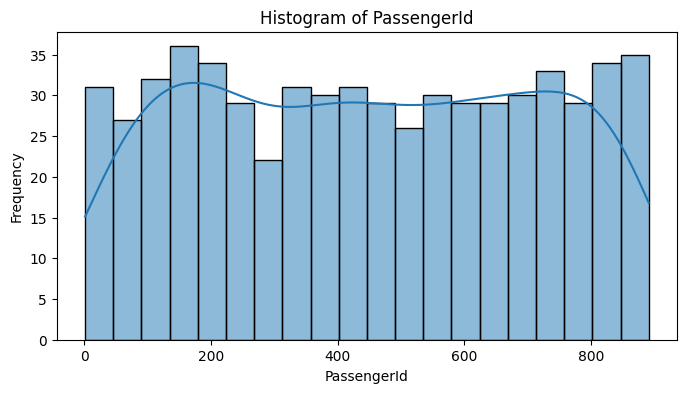

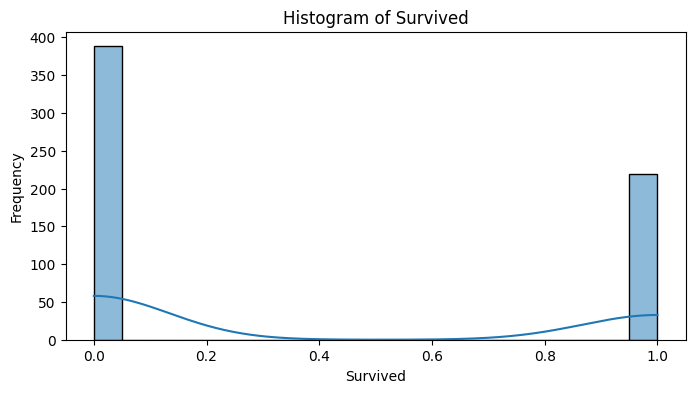

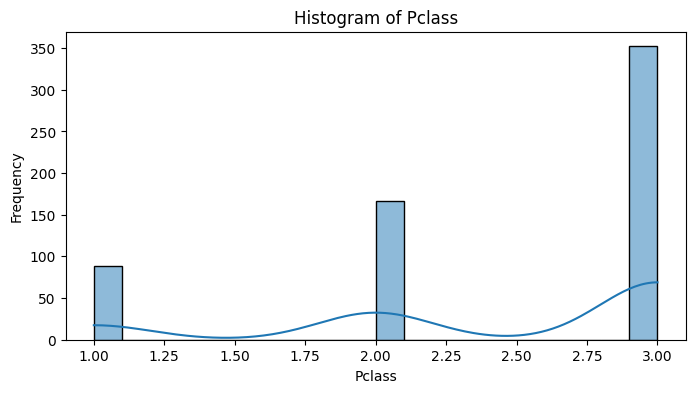

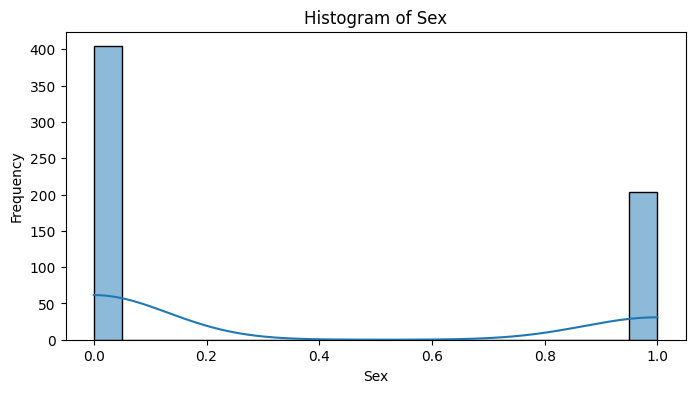

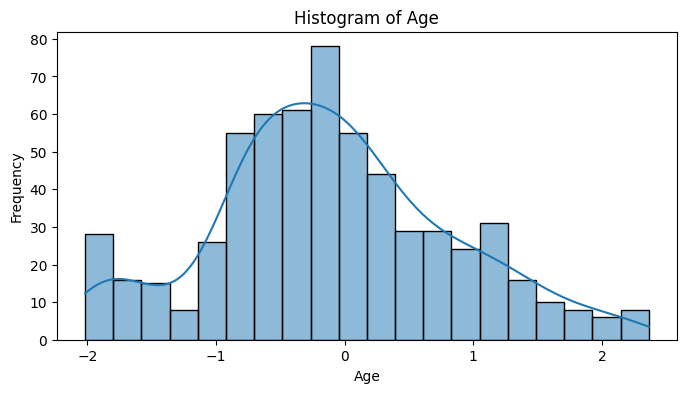

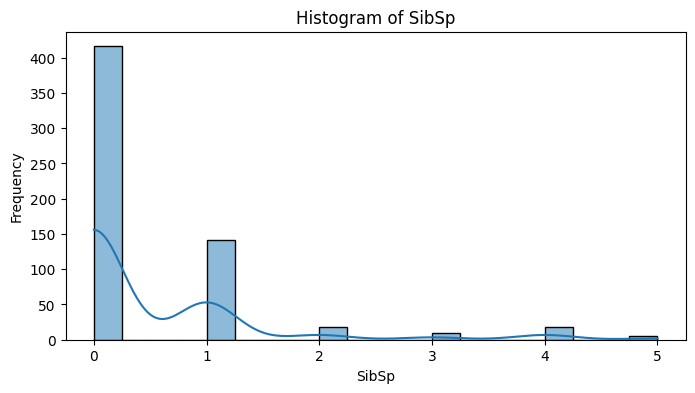

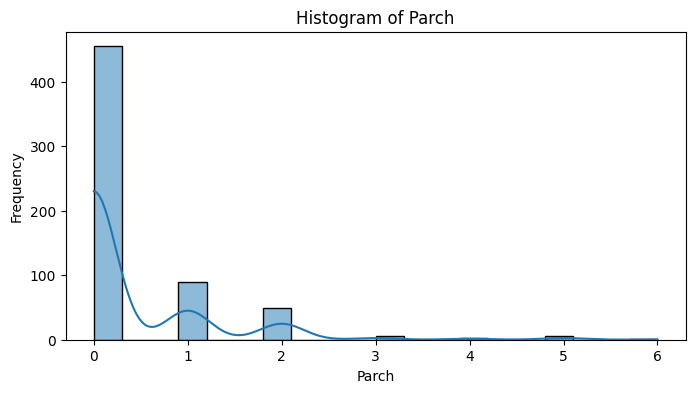

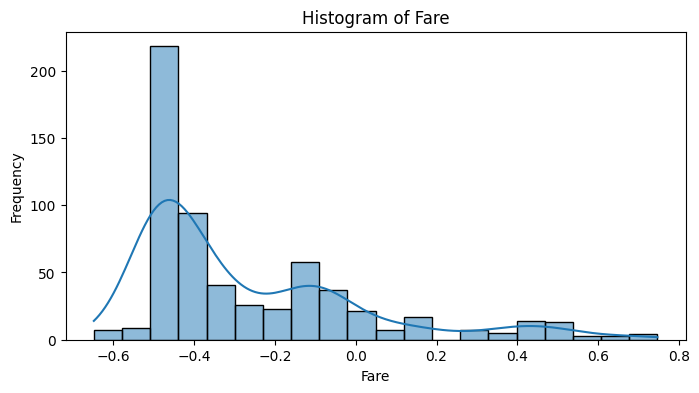

In [8]:
#Create histograms and boxplots for numeric features.

# Identify numeric columns
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns.tolist()

# Create histograms for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(cleaned_data[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


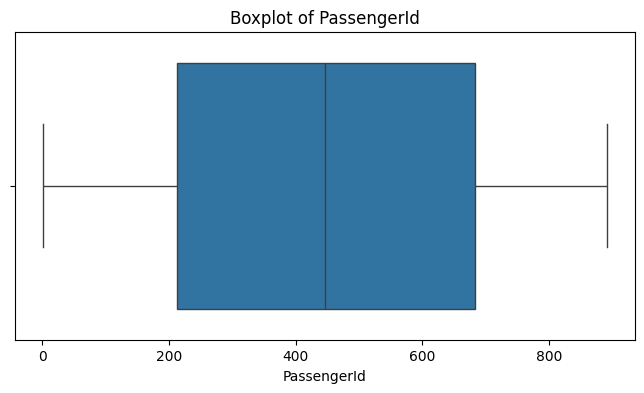

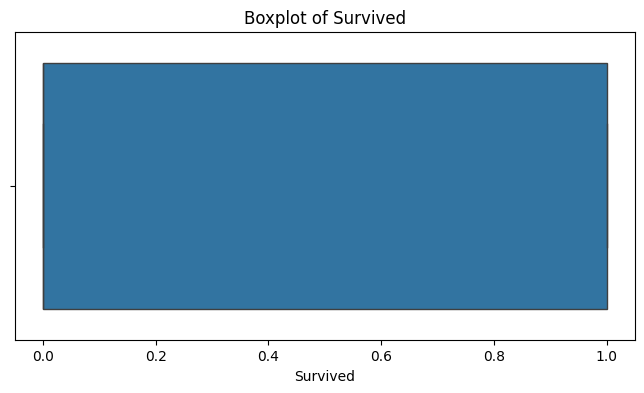

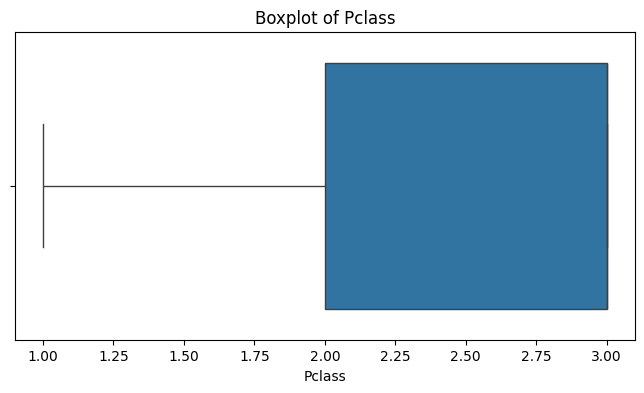

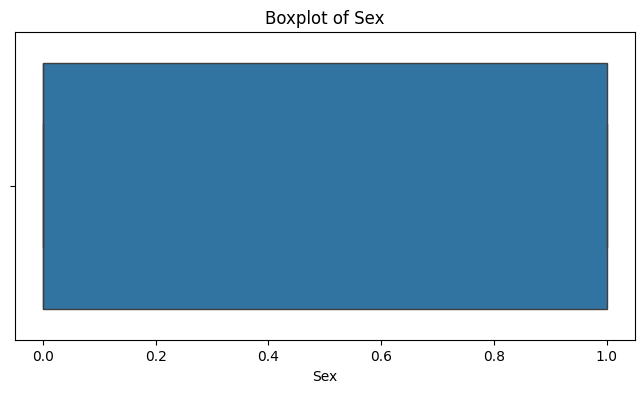

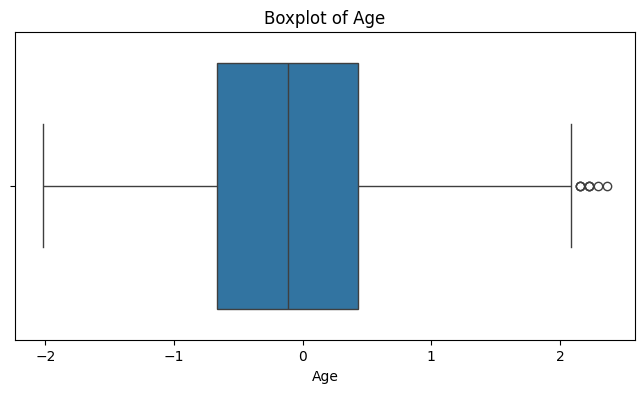

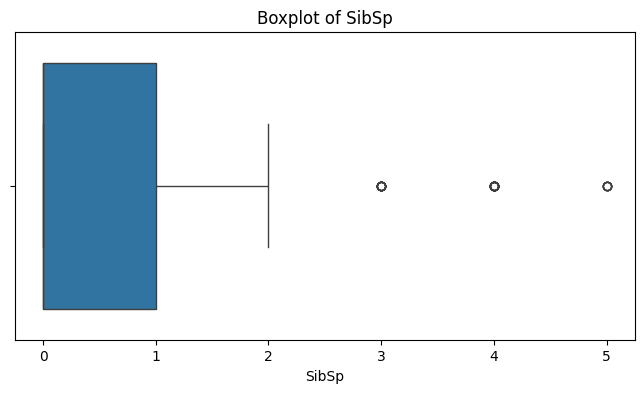

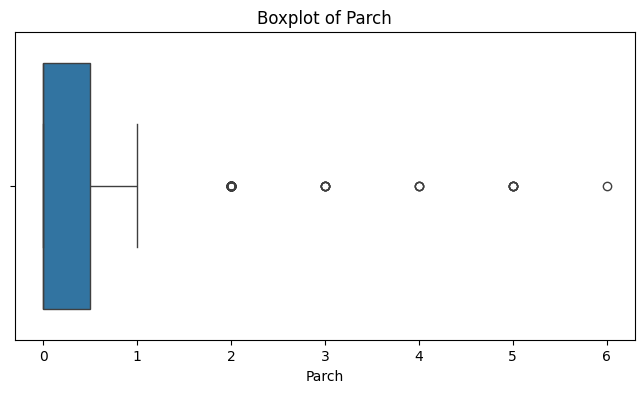

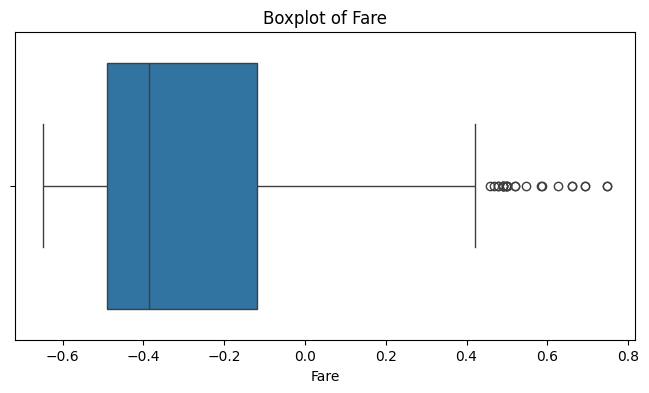

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cleaned_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


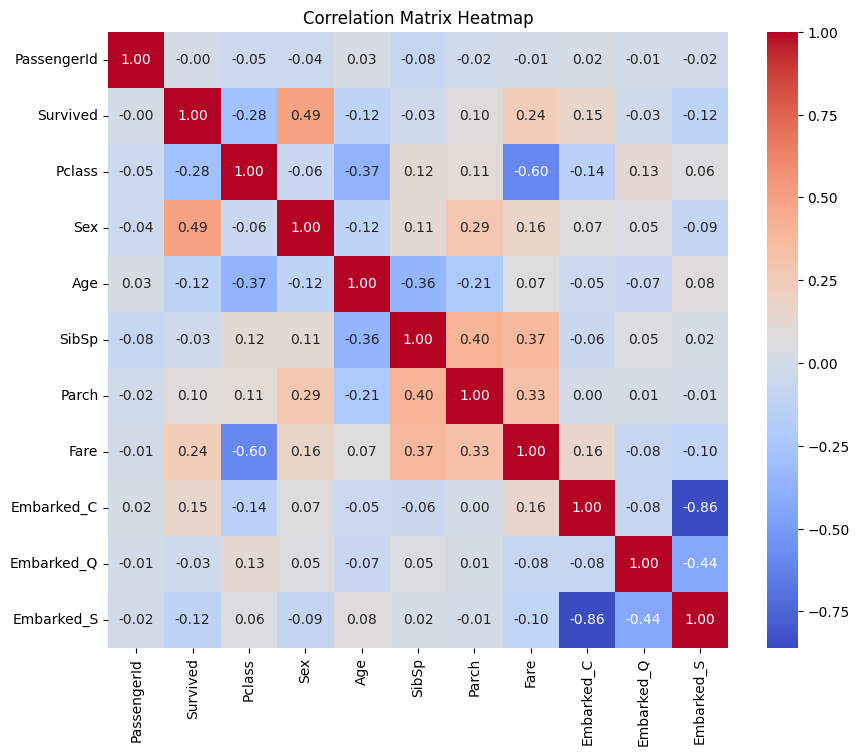

In [10]:
# Compute the correlation matrix for numeric columns
corr_matrix = cleaned_data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


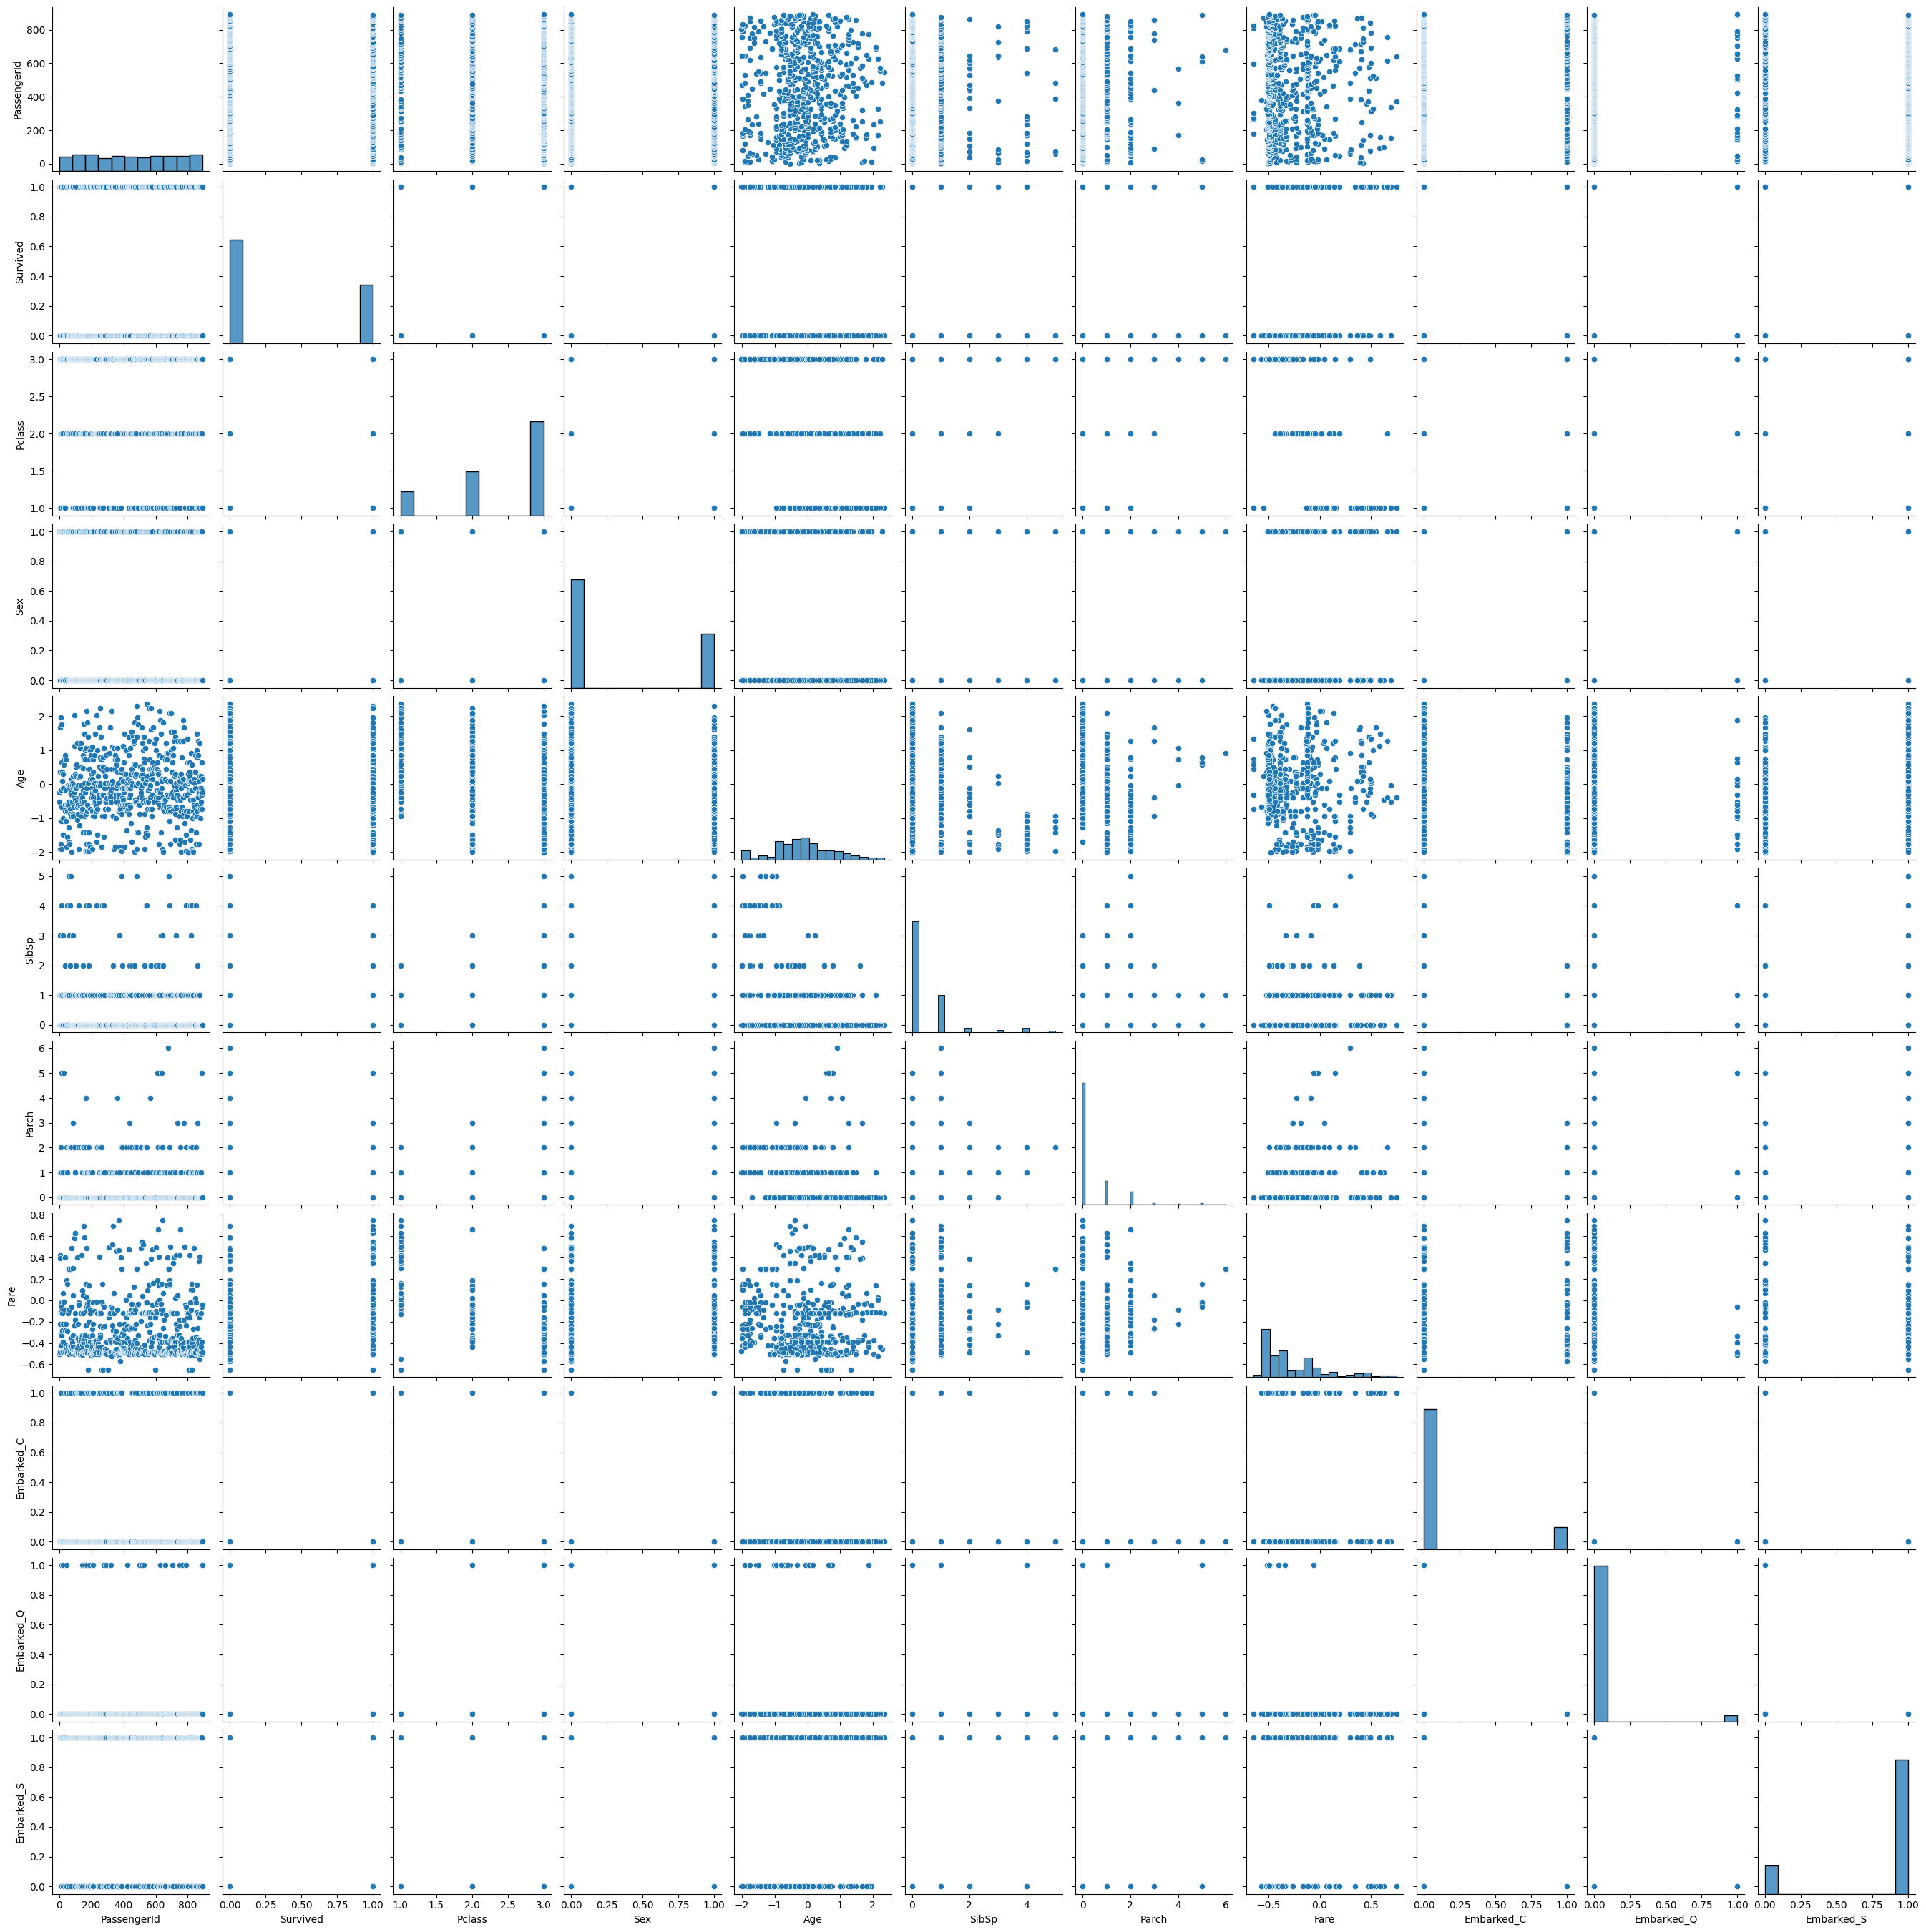

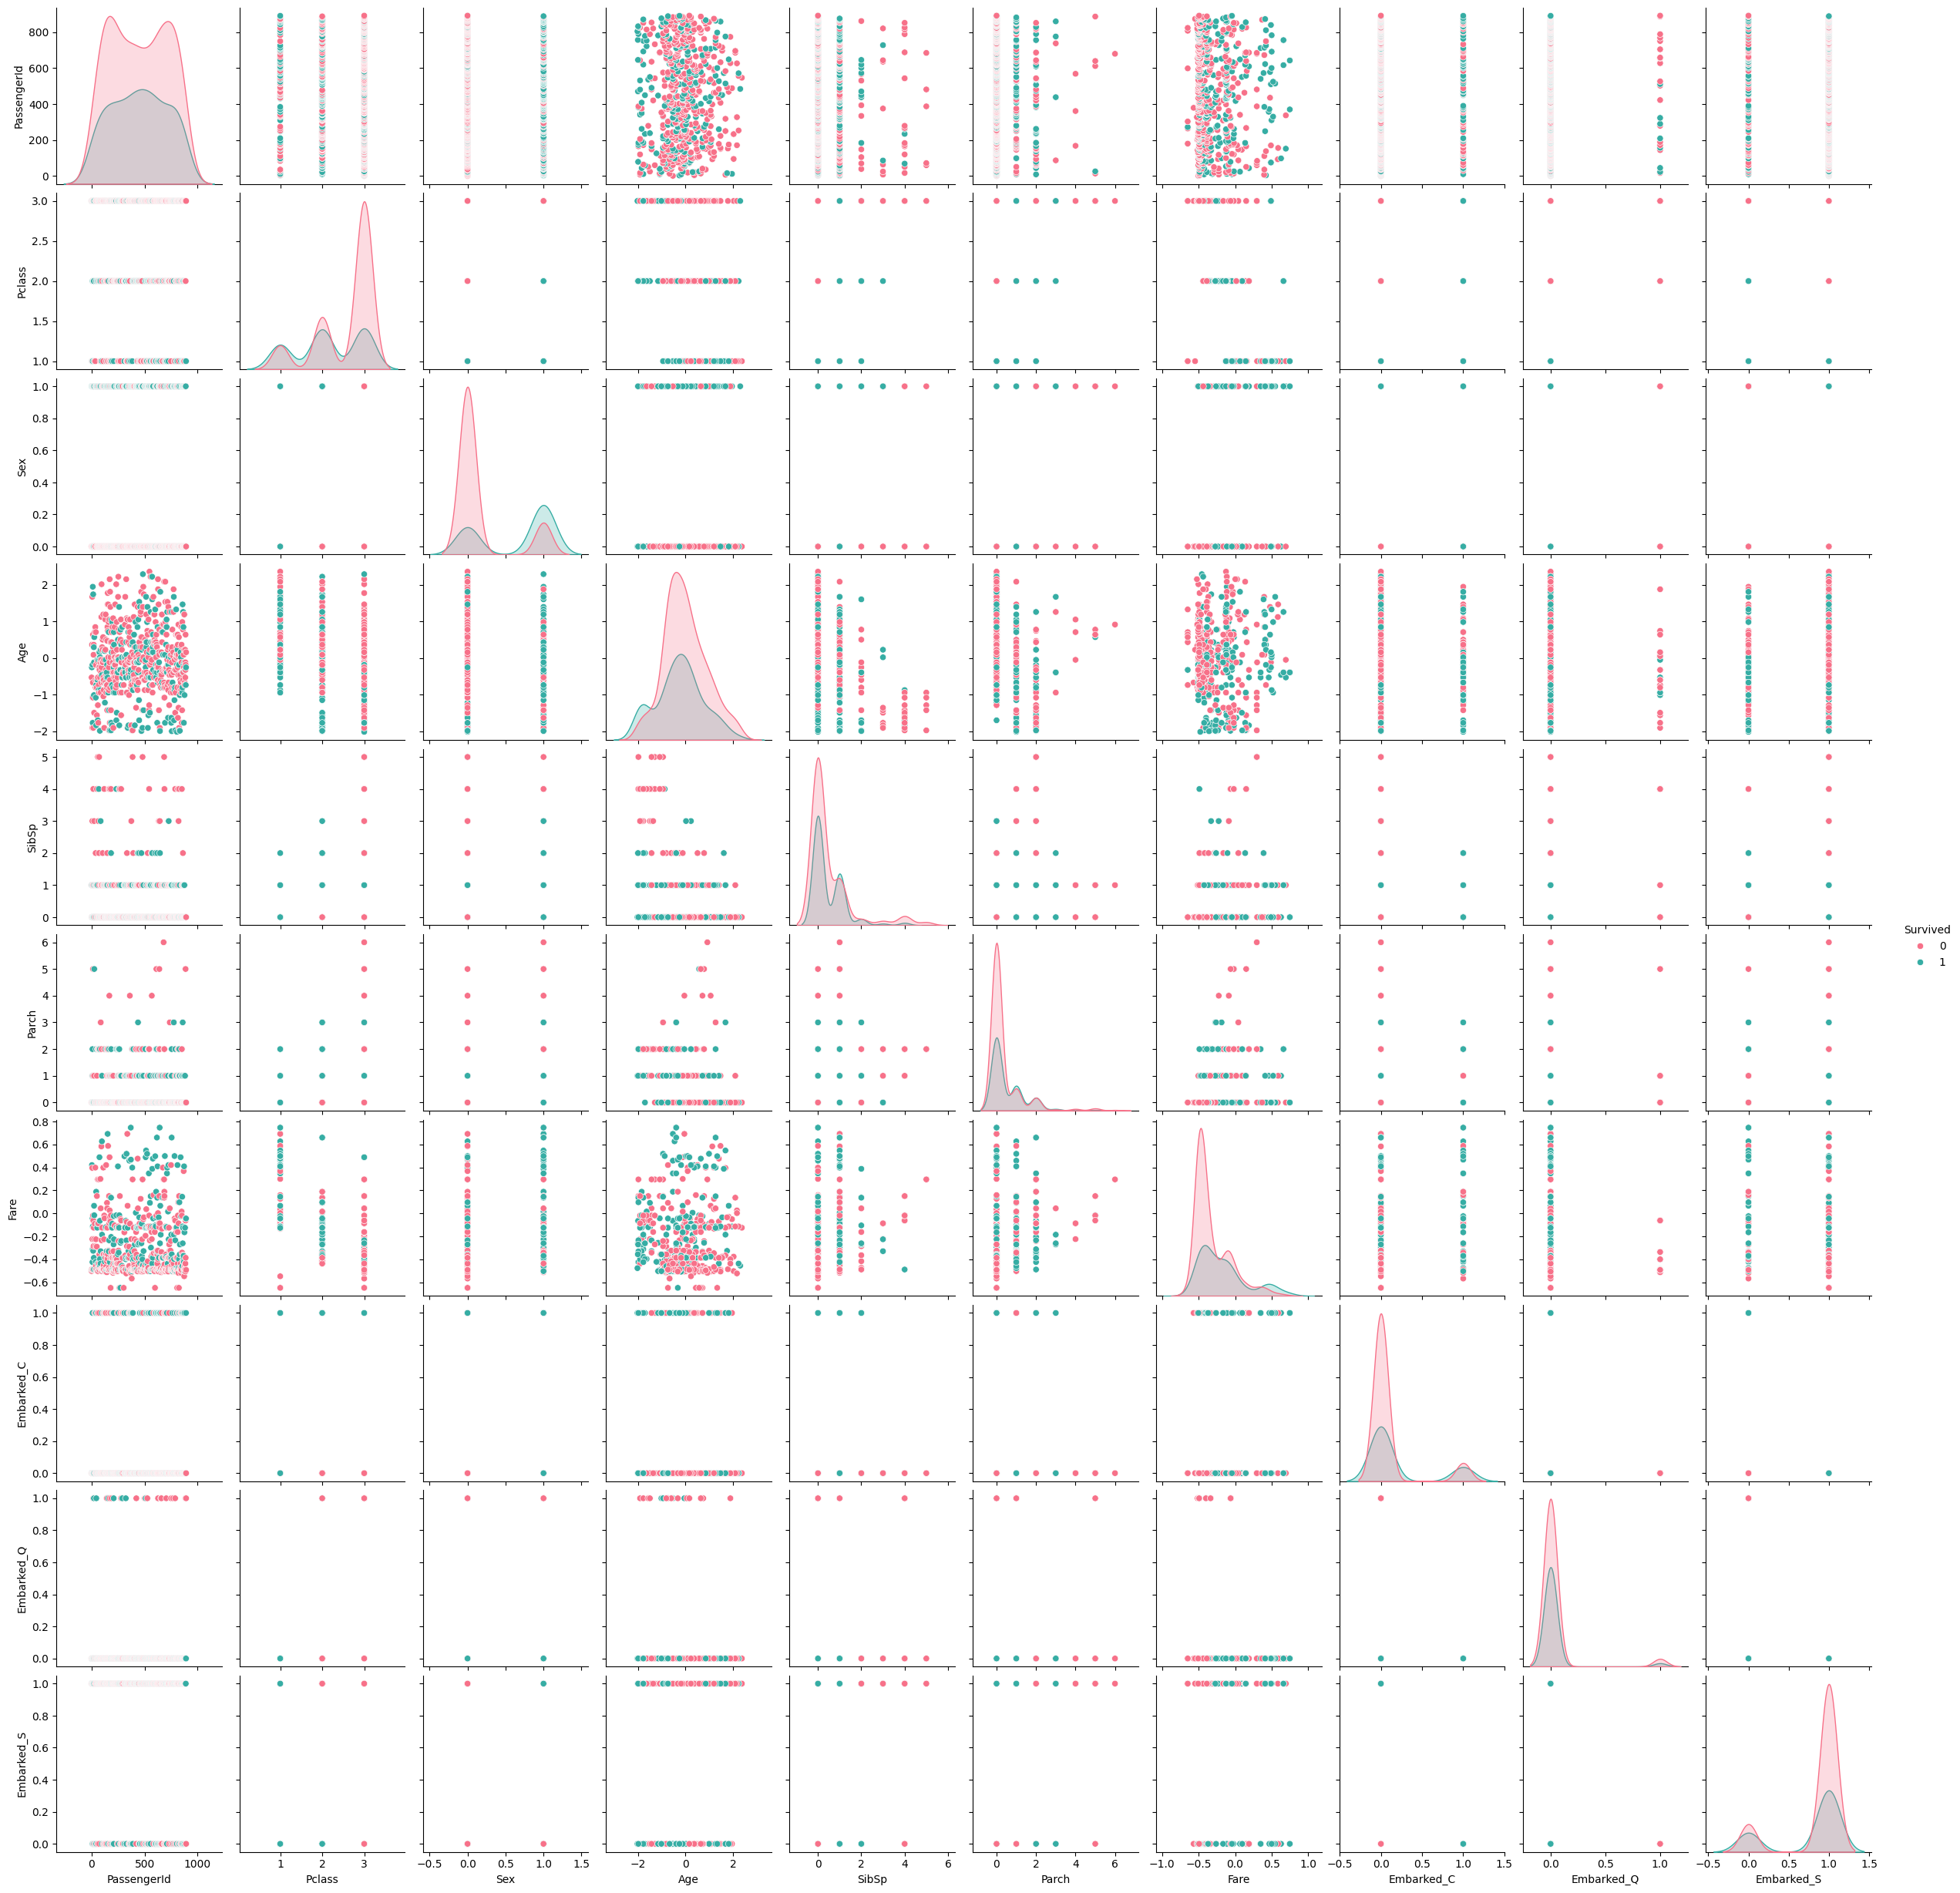

In [11]:
# Basic pairplot for all numeric features
sns.pairplot(cleaned_data)
plt.show()

# Pairplot colored by 'Survived' (if present)
if 'Survived' in cleaned_data.columns:
    sns.pairplot(cleaned_data, hue='Survived', diag_kind='kde', palette='husl')
    plt.show()


Identify patterns, trends, or anomalies in the data.

-Females and higher-class passengers were more likely to survive (positive correlation between Sex and Survived, negative between Pclass and Survived).

-Higher fares were paid by higher-class passengers (Fare and Pclass are strongly negatively correlated).

-Family members often traveled together (SibSp and Parch are moderately correlated).

-No major outliers or anomalies are present after cleaning.

-Age has little correlation with survival in this dataset.

SUMMARY:


-Most Titanic passengers were young adults, traveling alone or with a small family group.

-Fare and family size distributions are skewed, with a few high-value outliers.

-No major anomalies or data errors are visible in these features.